# Trabajo práctico Integrador
## Materia “Introducción al Aprendizaje Estadístico”
## Diplomatura en Ciencias Sociales Computacionales.
## Universidad Nacional Guillermo Brown - UnaB

### Estudiantes
#### De León, Romina 
#### Wettstein, Margarita?
#### Matías?

### Objetivo.
#### El presente trabajo tiene como finalidad la integración aplicación de las técnicas estudiadas durante la materia como así también la aplicación correcta de los algoritmos.

In [2]:
#Importante, si no se encuentran las librerías instaladas deben instalarse mediante "pip install nombre.libreria"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io

In [3]:
#este punto está repetido o leemos el csv o lo descargamos de github, si lo hacemos utilicemos alguna cuenta nuestra

df=pd.read_csv("Buenos_Aires_AIRBNB.csv")
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,Palermo,-34.58241,-58.43382,Entire home/apt,2033,20,14,30-04-2018,0.15,1,363
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58225,-58.42460,Entire home/apt,3588,2,25,13-08-2019,0.28,1,281
2,12463,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.59761,-58.39468,Private room,1435,1,20,11-12-2017,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.59382,-58.42994,Private room,2691,1,1,18-12-2018,0.09,7,360
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.59398,-58.42853,Private room,2691,1,0,NaN,NaN,7,360


In [ ]:
#url = 'https://raw.githubusercontent.com/Marian2057/TP1_Aprendizaje_Estad-stico/main/Buenos_Aires_AIRBNB.csv'
#base = pd.read_csv(url)
#base.head()

# 1. PARTE I. Estadística descriptiva.

## a-¿Qué columnas tiene?¿Qué tipo de columnas son?

In [6]:
dimension = df.shape
print("Dimension del conjunto de datos:", dimension, "\n")

#Filas
print(f'Cantidad de filas: {df.shape[0]}\n')

#Columnas
print(f'Cantidad de columnas: {df.shape[1]} \n')

# Columnas
columnas = df.columns
print("Columnas:", columnas, "\n")

# Tipos de datos de las columnas
tipos = df.dtypes
print("Tipos de datos:", tipos, "\n")

#Info de datos nulos
nulos = df.info()
print("Valores Nulos:", nulos, "\n")

Dimension del conjunto de datos: (22877, 15) 

Cantidad de filas: 22877

Cantidad de columnas: 15 

Columnas: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object') 

Tipos de datos: id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
av

esto de reemplazar los null por 999 estara bien???
configuré el output scrolling como list o algo así 

In [7]:
# Reemplazar los valores faltantes por -999
df = df.fillna(-999)

In [8]:
dimension = df.shape
print("Dimension del conjunto de datos:", dimension, "\n")

#Filas
print(f'Cantidad de filas: {df.shape[0]}\n')

#Columnas
print(f'Cantidad de columnas: {df.shape[1]} \n')

# Columnas
columnas = df.columns
print("Columnas:", columnas, "\n")

# Tipos de datos de las columnas
tipos = df.dtypes
print("Tipos de datos:", tipos, "\n")

#Info de datos nulos
nulos = df.info()
print("Valores Nulos:", nulos, "\n")

Dimension del conjunto de datos: (22877, 15) 

Cantidad de filas: 22877

Cantidad de columnas: 15 

Columnas: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object') 

Tipos de datos: id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
av

In [9]:
#Para ver las categorias de las variables cualitativas
nombre=df.name.unique()
print("Nombres: \n", nombre, "\n")

nombre_host=df.host_name.unique()
print("Nombres host: \n", nombre_host, "\n")

vecindario=df.neighbourhood.unique()
print("Vecindario: \n", vecindario, "\n")

Habitacion_tipo=df.room_type.unique()
print("room_type: \n", Habitacion_tipo, "\n")

ultima_revision=df.last_review.unique()
print("Nombres: \n", ultima_revision, "\n")

Nombres: 
 ['¡¡Great Loft in Palermo Hollywood!!'
 'Amazing Luxurious Apt-Palermo Soho'
 'Room in Recoleta - awesome location' ...
 'Sunny room in Palermo Hollywood' 'Studio Luminoso en Palermo Soho.'
 'Hermoso dpto en Caballito,luminoso,seguro'] 

Nombres host: 
 ['Toni' 'Candela' 'Matt' ... 'Dalinda' 'María S.' 'Rodrigo Sebastian'] 

Vecindario: 
 ['Palermo' 'Recoleta' 'Monserrat' 'Nuñez' 'Balvanera' 'Belgrano'
 'San Nicolas' 'San Telmo' 'Constitucion' 'Puerto Madero' 'Chacarita'
 'Villa Crespo' 'Retiro' 'San Cristobal' 'Almagro' 'Colegiales' 'Boedo'
 'Caballito' 'Villa Ortuzar' 'Nueva Pompeya' 'Parque Chacabuco' 'Barracas'
 'Villa Urquiza' 'Coghlan' 'Parque Patricios' 'Boca' 'Saavedra'
 'Villa Devoto' 'Flores' 'Monte Castro' 'Velez Sarsfield'
 'Villa Gral. Mitre' 'Parque Chas' 'Floresta' 'Paternal'
 'Villa Del Parque' 'Versalles' 'Mataderos' 'Villa Pueyrredon' 'Agronomia'
 'Parque Avellaneda' 'Villa Luro' 'Liniers' 'Villa Lugano'
 'Villa Santa Rita' 'Villa Real' 'Villa Riachuelo' 'V

In [13]:
#deberíamos aclarar cada paso que hacemos?
df.describe(include=['O'])

,name,host_name,neighbourhood,room_type,last_review
count,22877,22877,22877,22877,22877
unique,22130,3707,48,4,1327
top,Departamento en Recoleta,Maria,Palermo,Entire home/apt,-999
freq,26,343,6934,17389,6445


## b. Análisis y aplicación de Medidas de Tendencia Central.

In [14]:
#Análisis de variables numericas
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.287700e+04,2.287700e+04,22877.000000,22877.000000,22877.000000,22877.000000,22877.000000,22877.000000,22877.000000,22877.000000
mean,2.487670e+07,9.739731e+07,-34.592534,-58.416364,3214.630196,5.653233,15.482974,-280.532629,6.296062,202.064912
std,1.191191e+07,9.274044e+07,0.018304,0.029937,12364.429880,21.513176,31.268565,449.970858,14.748998,134.161675
min,7.270000e+03,2.616000e+03,-34.688950,-58.530200,120.000000,1.000000,0.000000,-999.000000,1.000000,0.000000
25%,1.631899e+07,1.363528e+07,-34.603400,-58.435630,1196.000000,1.000000,0.000000,-999.000000,1.000000,83.000000
50%,2.856388e+07,6.212518e+07,-34.591830,-58.415950,1973.000000,3.000000,4.000000,0.340000,1.000000,180.000000
75%,3.454449e+07,1.713546e+08,-34.581970,-58.392220,2990.000000,4.000000,16.000000,1.260000,4.000000,343.000000
max,4.035243e+07,3.118884e+08,-34.532720,-58.354880,597865.000000,1125.000000,600.000000,37.580000,105.000000,365.000000


### Analisis de la media, meadiana y moda de precio

#### *Media, mediana y moda*

In [15]:
print(f"El precio promedio que se paga en Airbnb {round(df['price'].mean(),2)}")
print(f"La mediana del precio que se paga en Airbnb {df['price'].median()}")
print(f"La modo del precio que se paga en Airbnb {df['price'].mode()}")


El precio promedio que se paga en Airbnb 3214.63
La mediana del precio que se paga en Airbnb 1973.0
La modo del precio que se paga en Airbnb 0    1794
Name: price, dtype: int64


#### La media es mayor a la mediana y la moda por lo que se espera una distribucion asimétrica a la derecha.

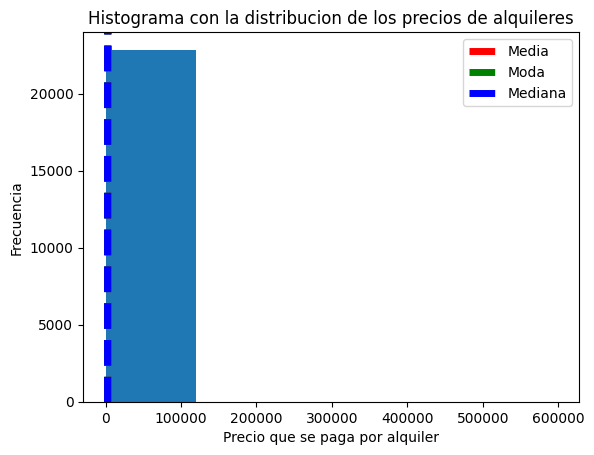

In [24]:
# Obtener la columna 'Precio'
#no estaría entendiendo este gráfico, me da una sola columna :(
columna = df['price']

# Calcular la media, moda y mediana
media = columna.mean()
moda = columna.mode().values[0]
mediana = columna.median()

# Crear el histograma
plt.hist(columna, bins=5)

# Agregar líneas verticales para la media, moda y mediana
plt.axvline(media, color='r', linestyle='dashed', linewidth=5, label='Media')
plt.axvline(moda, color='g', linestyle='dashed', linewidth=5, label='Moda')
plt.axvline(mediana, color='b', linestyle='dashed', linewidth=5, label='Mediana')

# Configurar etiquetas y título del gráfico
plt.xlabel('Precio que se paga por alquiler')
plt.ylabel('Frecuencia')
plt.title('Histograma con la distribucion de los precios de alquileres')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


#### se puede interpretar viendo el grafico que hay outliers en el precio 

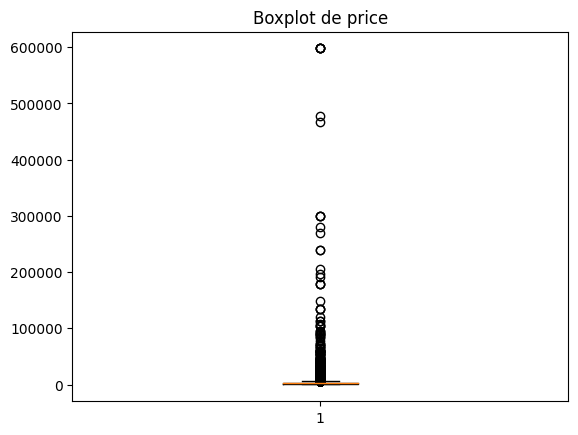

In [34]:
# analizo esos outliers
#acá me tira error cuando dejo el >36000

plt.boxplot(df['price'])
plt.title('Boxplot de {}'.format('price'))
plt.show()

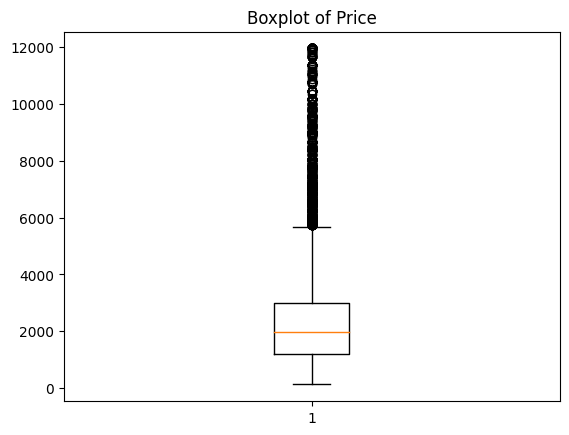

In [32]:

filtered_data = df[df['price'] < 12000]['price']

plt.boxplot(filtered_data)
plt.title('Boxplot of Price')
plt.show()


In [35]:
filtered_data.shape

(22452,)

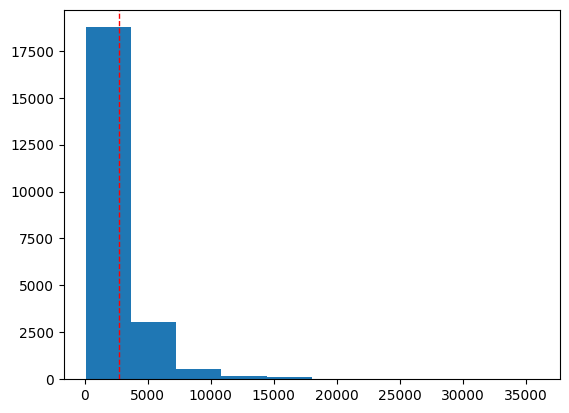

In [44]:
# Filtrar el DataFrame base
base_filtrado = df[df['price'] < 36000]

# Obtener la columna 'price' filtrada
columna = base_filtrado['price']

# Calcular la media, moda y mediana
media = columna.mean()
#moda = mode(base['price']) acá me salta error 
mediana = columna.median()

# Crear el histograma
plt.hist(columna, bins=10)

# Agregar líneas verticales para la media, moda y mediana
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label='Media')
#plt.axvline(moda, color='g', linestyle='dashed', linew) acá salta error

### Analisis de la media, meadiana y moda del minimo de noches 

#### Media, mediana y moda

In [45]:
print(f"El minimo de noches promedio de un alquiler en Airbnb {round(df['minimum_nights'].mean(),2)}")
print(f"La mediana del minimo de noches promedio de un alquiler en Airbnb {df['minimum_nights'].median()}")
print(f"La moda del del minimo de noches promedio de un alquiler en Airbnb {df['minimum_nights'].mode()}")

El minimo de noches promedio de un alquiler en Airbnb 5.65
La mediana del minimo de noches promedio de un alquiler en Airbnb 3.0
La moda del del minimo de noches promedio de un alquiler en Airbnb 0    1
Name: minimum_nights, dtype: int64


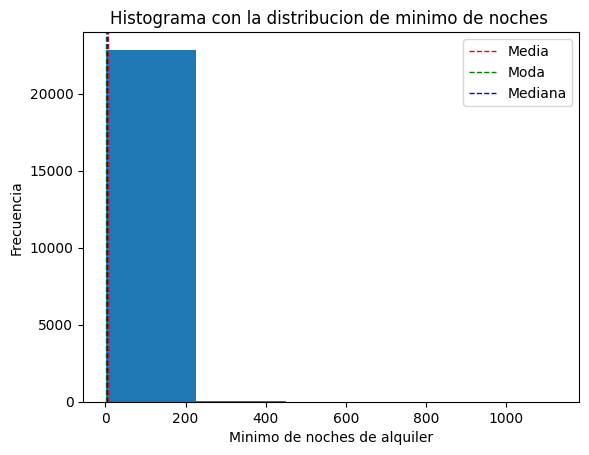

In [46]:
# Obtener la columna 'Precio'
columna1 = df['minimum_nights']

# Calcular la media, moda y mediana
media = columna1.mean()
moda = columna1.mode().values[0]
mediana = columna1.median()

# Crear el histograma ESTE GRAFICO también me devuelve una sola columna
plt.hist(columna1, bins=5)

# Agregar líneas verticales para la media, moda y mediana
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(moda, color='g', linestyle='dashed', linewidth=1, label='Moda')
plt.axvline(mediana, color='b', linestyle='dashed', linewidth=1, label='Mediana')

# Configurar etiquetas y título del gráfico
plt.xlabel('Minimo de noches de alquiler')
plt.ylabel('Frecuencia')
plt.title('Histograma con la distribucion de minimo de noches ')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


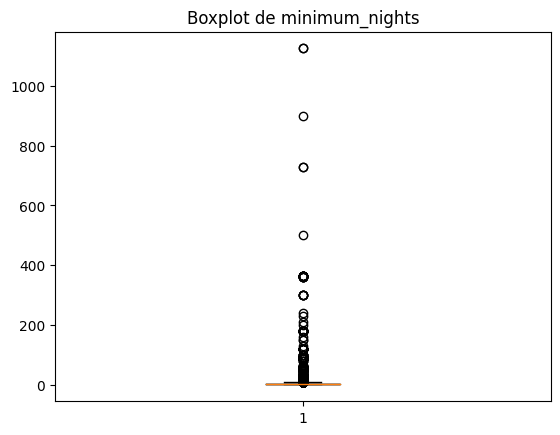

In [47]:
# analizo esos outliers
plt.boxplot(df['minimum_nights'])
plt.title('Boxplot de {}'.format('minimum_nights'))
plt.show()

In [48]:

# Calcular la mediana de la columna Precio
mediana = df['price'].median()

# Definir los límites de los intervalos basados en la mediana
bins = [float('-inf'), mediana, float('inf')]

# Definir las etiquetas para cada categoría
labels = ['Menor a la mediana', 'Mayor a la mediana']

# Crear la nueva variable categórica utilizando la función cut()
df['mediana_precio'] = pd.cut(df['price'], bins=bins, labels=labels)


In [49]:

# Calcular la mediana de la columna Precio
mediana1 = df['minimum_nights'].median()

# Definir los límites de los intervalos basados en la mediana
bins = [float('-inf'), mediana1, float('inf')]

# Definir las etiquetas para cada categoría
labels = ['Menor a la mediana', 'Mayor a la mediana']

# Crear la nueva variable categórica utilizando la función cut()
df['mediana_minimo_noches'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels)

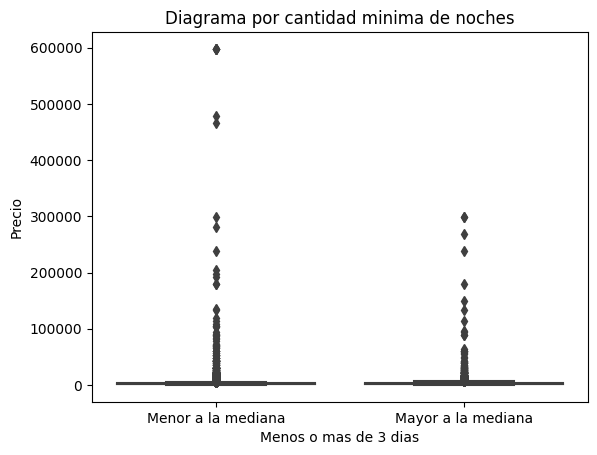

In [51]:
#recordar instalar seaborn
import seaborn as sns

# Crear el diagrama de caja por categoría
sns.boxplot(x='mediana_minimo_noches', y='price', data=df)

# Añadir título y etiquetas a los ejes
plt.title('Diagrama por cantidad minima de noches')
plt.xlabel('Menos o mas de 3 dias')
plt.ylabel('Precio')

# Mostrar el diagrama
plt.show()


In [ ]:
import seaborn as sns

# Crear el diagrama de caja por categoría
#no me reconoce room_type

sns.boxplot(x='room_type', y='price', data=filtered_data)

# Añadir título y etiquetas a los ejes

# Mostrar el diagrama
plt.show()



Habia asumido que los precios mas altos estaban relacionados con mayor cantidad minima de dias pero en el grafico de cajas por categoria no se observa eso.

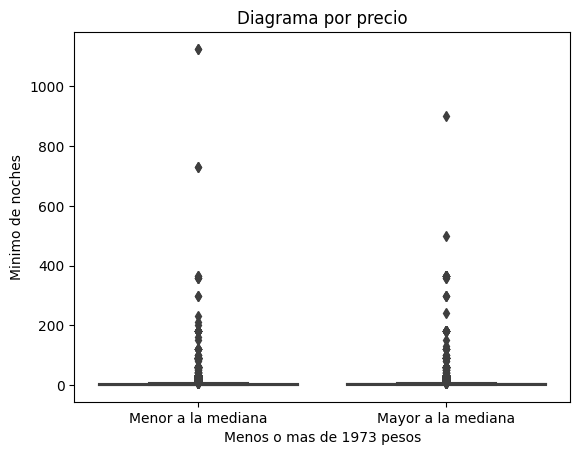

In [55]:

# Crear el diagrama de caja por categoría
sns.boxplot(x='mediana_precio', y='minimum_nights', data=df)

# Añadir título y etiquetas a los ejes
plt.title('Diagrama por precio')
plt.xlabel('Menos o mas de 1973 pesos')
plt.ylabel('Minimo de noches')

# Mostrar el diagrama
plt.show()

In [56]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,mediana_precio,mediana_minimo_noches
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,Palermo,-34.58241,-58.43382,Entire home/apt,2033,20,14,30-04-2018,0.15,1,363,Mayor a la mediana,Mayor a la mediana
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58225,-58.42460,Entire home/apt,3588,2,25,13-08-2019,0.28,1,281,Mayor a la mediana,Menor a la mediana
2,12463,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.59761,-58.39468,Private room,1435,1,20,11-12-2017,0.17,1,365,Menor a la mediana,Menor a la mediana
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.59382,-58.42994,Private room,2691,1,1,18-12-2018,0.09,7,360,Mayor a la mediana,Menor a la mediana
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.59398,-58.42853,Private room,2691,1,0,-999,-999.00,7,360,Mayor a la mediana,Menor a la mediana


In [57]:
df.groupby('mediana_precio').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,mediana_minimo_noches
mediana_precio,,,,,,,,,,,,,,,,
Menor a la mediana,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444,11444
Mayor a la mediana,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433,11433


In [58]:
df.groupby('mediana_minimo_noches').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,mediana_precio
mediana_minimo_noches,,,,,,,,,,,,,,,,
Menor a la mediana,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172,16172
Mayor a la mediana,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705,6705


#### Desvio estandar, varialza, rango, rango IQR del precio

In [59]:
from scipy import stats
print(f"El desvio estandar del precio es {round(np.std(df['price']),2)}")
print(f"La varianza del precio es {round(np.var(df['price']),2)}")
print(f"El rango del precio es {round(df['price'].max()-df['price'].min(),2)}")
print(f"El IQR del precio es {stats.iqr(df['price'],interpolation='midpoint')}")

El desvio estandar del precio es 12364.16
La varianza del precio es 152872443.59
El rango del precio es 597745
El IQR del precio es 1794.0


#### Desvio estandar, varialza, rango, rango IQR del minimo de noches

In [60]:
print(f"El desvio estandar del minimo de noches es {round(np.std(df['minimum_nights']),2)}")
print(f"La varianza del del minimo de noches es {round(np.var(df['minimum_nights']),2)}")
print(f"El rango del del minimo de noches es {round(df['minimum_nights'].max()-df['minimum_nights'].min(),2)}")
print(f"El IQR del del minimo de noches es {stats.iqr(df['minimum_nights'],interpolation='midpoint')}")

El desvio estandar del minimo de noches es 21.51
La varianza del del minimo de noches es 462.8
El rango del del minimo de noches es 1124
El IQR del del minimo de noches es 3.0


In [61]:
df_cuantitativas =df[['latitude',
       'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]


In [ ]:
# Calcular el rango y el IQR
#me dice que el df no tiene append
custom_describe = df_cuantitativas.describe().append(df_cuantitativas.apply(lambda x: np.ptp(x), axis=0).rename('Rango')).append(df_cuantitativas.apply(lambda x: np.subtract(*np.percentile(x, [75, 25])), axis=0).rename('IQR'))
custom_describe

## d. Análisis de covarianza entre las variables.

#### Covarianza entre precio y minimo de noches

In [63]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'mediana_precio',
       'mediana_minimo_noches'],
      dtype='object')

<Axes: xlabel='minimum_nights', ylabel='price'>

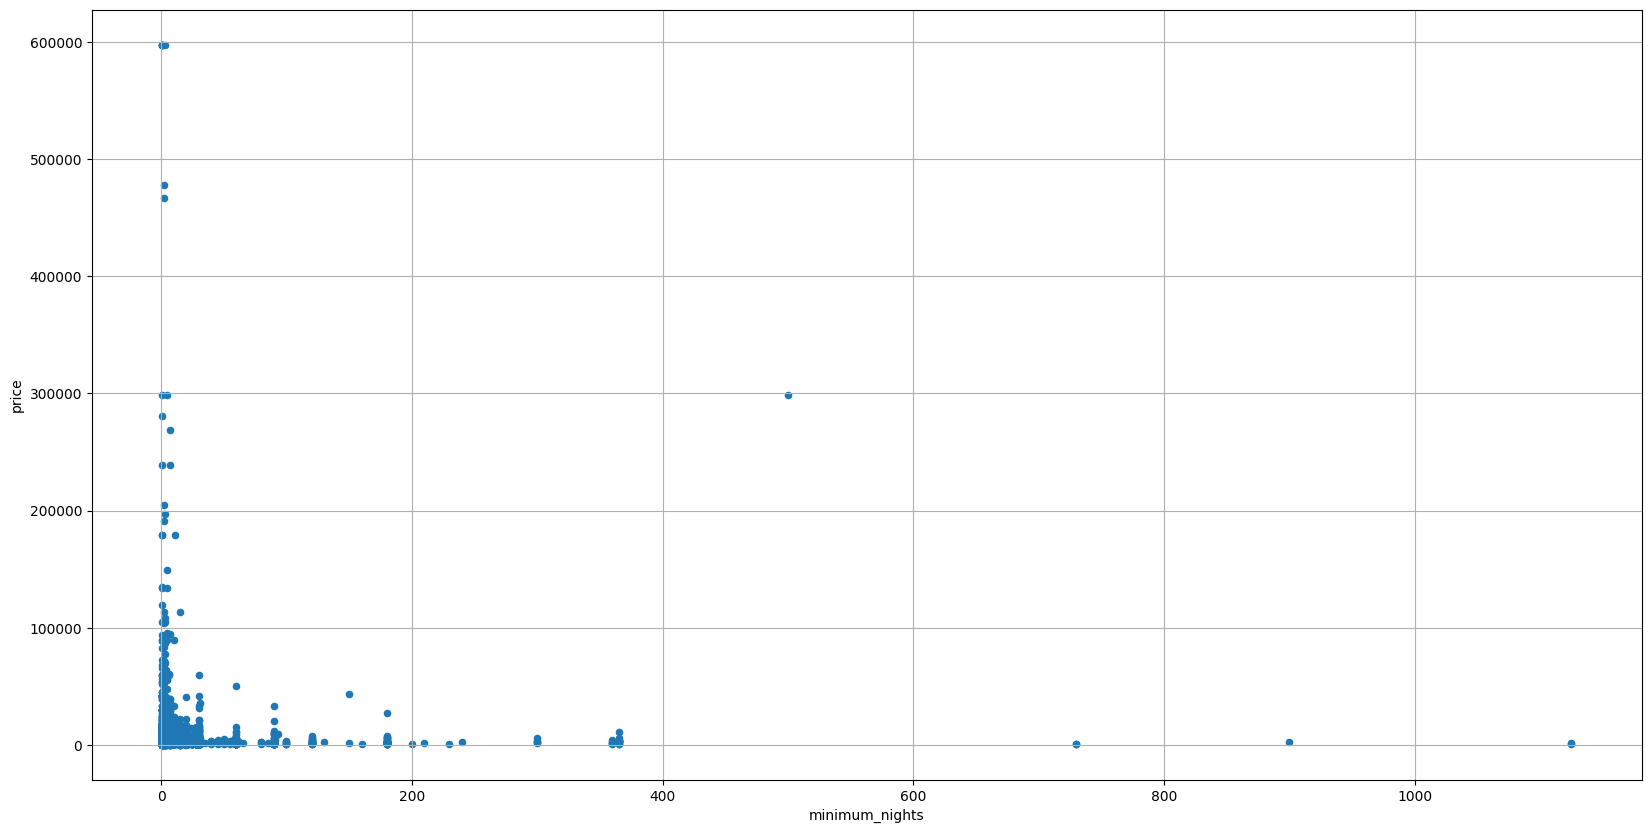

In [64]:
df.plot(kind='scatter',x='minimum_nights',y='price',grid=True,figsize=(20,10))

In [65]:
round(df_cuantitativas.agg(['mean','median','std', 'var']),2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,-34.59,-58.42,3.214630e+03,5.65,15.48,-280.53,6.30,202.06
median,-34.59,-58.42,1.973000e+03,3.00,4.00,0.34,1.00,180.00
std,0.02,0.03,1.236443e+04,21.51,31.27,449.97,14.75,134.16
var,0.00,0.00,1.528791e+08,462.82,977.72,202473.77,217.53,17999.36


In [66]:
print(round(df_cuantitativas.var()),1)
matriz_cov = round(df_cuantitativas.cov(),1)
matriz_cov

latitude                                  0.0
longitude                                 0.0
price                             152879126.0
minimum_nights                          463.0
number_of_reviews                       978.0
reviews_per_month                    202474.0
calculated_host_listings_count          218.0
availability_365                      17999.0
dtype: float64 1


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,0.0,-0.0,1.1,0.0,0.0,0.3,0.0,-0.1
longitude,-0.0,0.0,11.8,-0.0,0.1,0.5,0.0,0.2
price,1.1,11.8,152879126.2,5162.2,-6163.4,-204098.9,4032.1,63975.4
minimum_nights,0.0,-0.0,5162.2,462.8,-40.4,-961.7,5.9,109.8
number_of_reviews,0.0,0.1,-6163.4,-40.4,977.7,4381.2,-25.7,207.7
reviews_per_month,0.3,0.5,-204098.9,-961.7,4381.2,202473.8,-832.2,617.6
calculated_host_listings_count,0.0,0.0,4032.1,5.9,-25.7,-832.2,217.5,181.3
availability_365,-0.1,0.2,63975.4,109.8,207.7,617.6,181.3,17999.4


In [67]:
matriz_corre = df_cuantitativas.corr()
matriz_corre

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.529895,0.004820,0.020927,0.011173,0.037289,0.023686,-0.027703
longitude,-0.529895,1.000000,0.031902,-0.026795,0.069840,0.037509,0.055916,0.061144
price,0.004820,0.031902,1.000000,0.019407,-0.015942,-0.036684,0.022110,0.038567
minimum_nights,0.020927,-0.026795,0.019407,1.000000,-0.060095,-0.099349,0.018651,0.038050
number_of_reviews,0.011173,0.069840,-0.015942,-0.060095,1.000000,0.311385,-0.055618,0.049511
reviews_per_month,0.037289,0.037509,-0.036684,-0.099349,0.311385,1.000000,-0.125401,0.010230
calculated_host_listings_count,0.023686,0.055916,0.022110,0.018651,-0.055618,-0.125401,1.000000,0.091626
availability_365,-0.027703,0.061144,0.038567,0.038050,0.049511,0.010230,0.091626,1.000000


<Axes: >

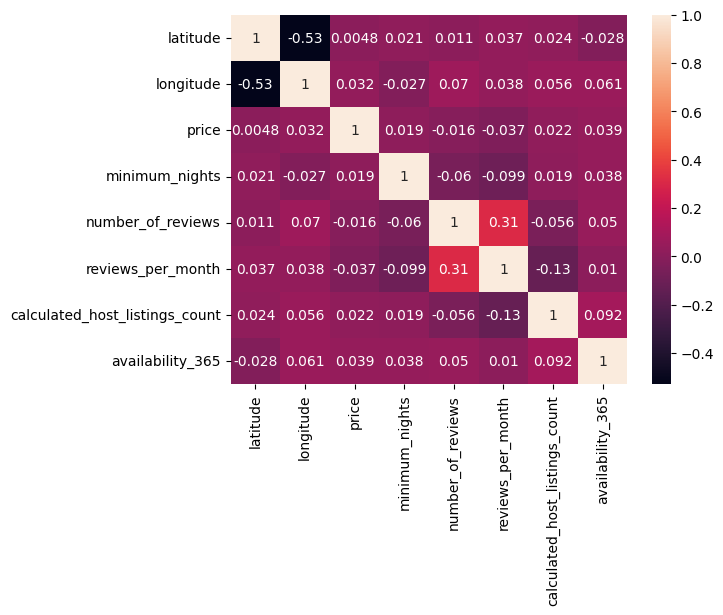

In [68]:
sns.heatmap(df_cuantitativas.corr(),annot=True)


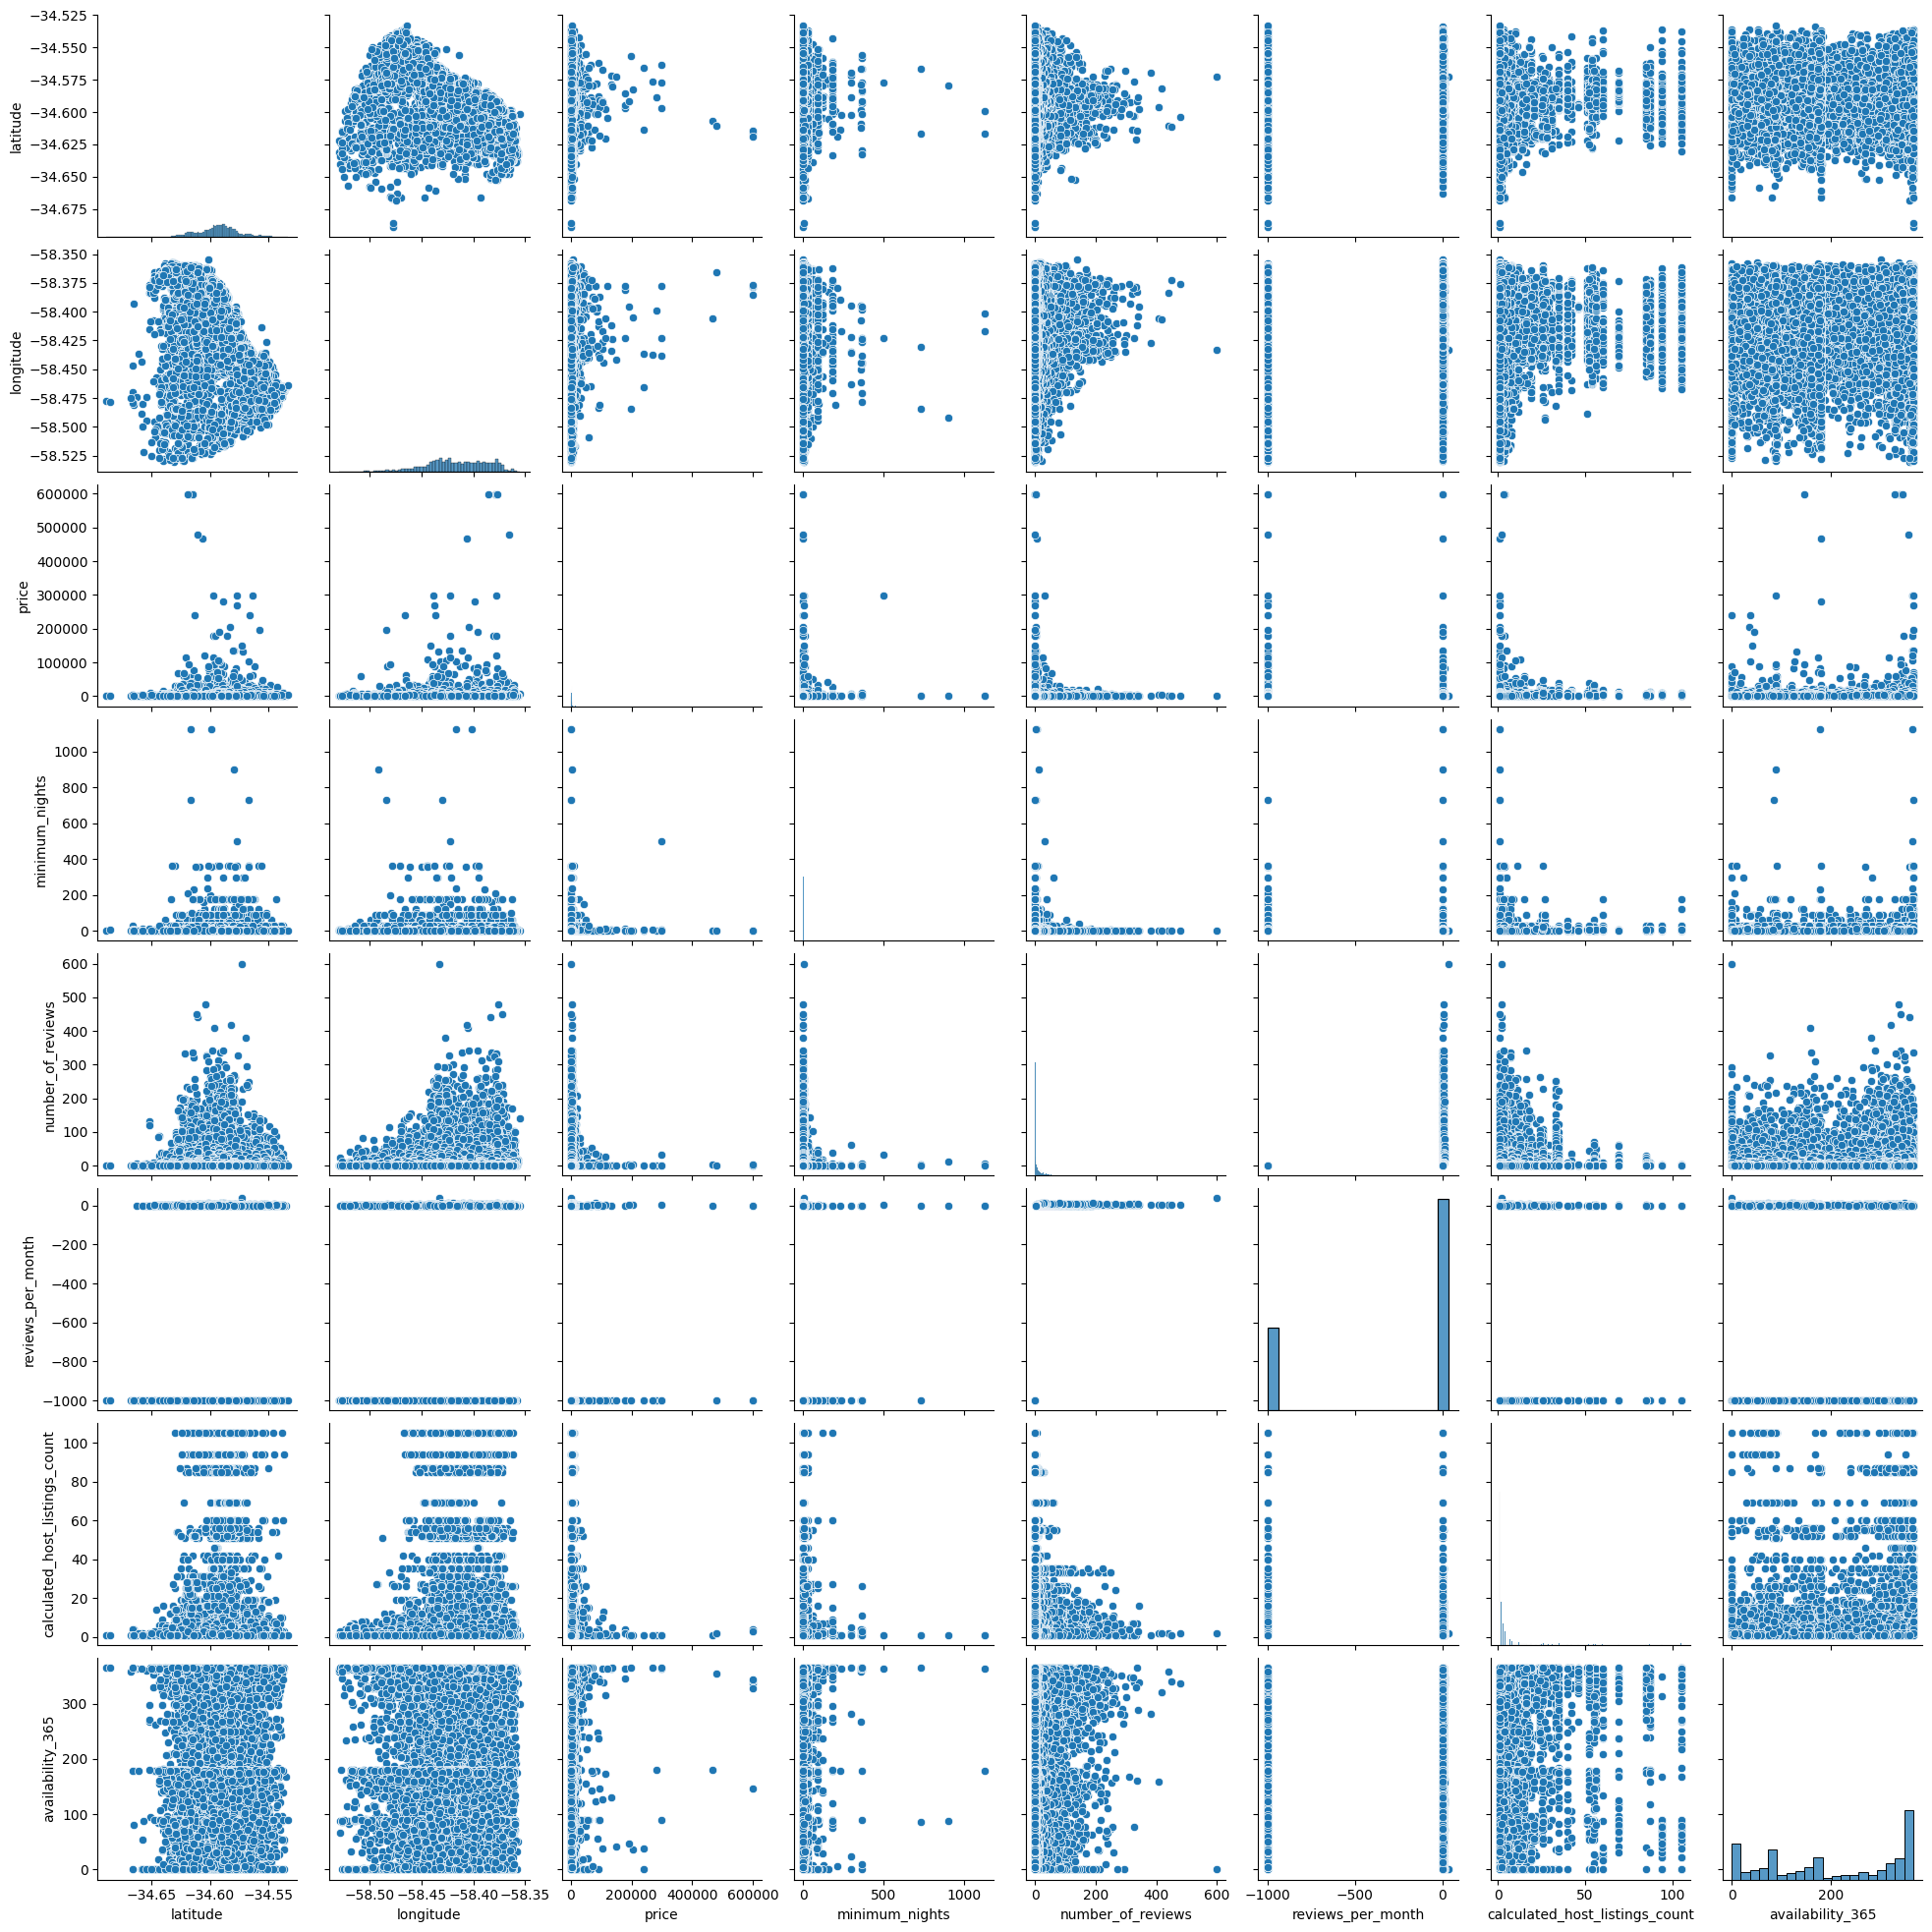

In [70]:
sns.pairplot(df_cuantitativas)
#el segundo gráfico tiene mucho sentido, porque es casi el map de CABA, debería analizar el resto

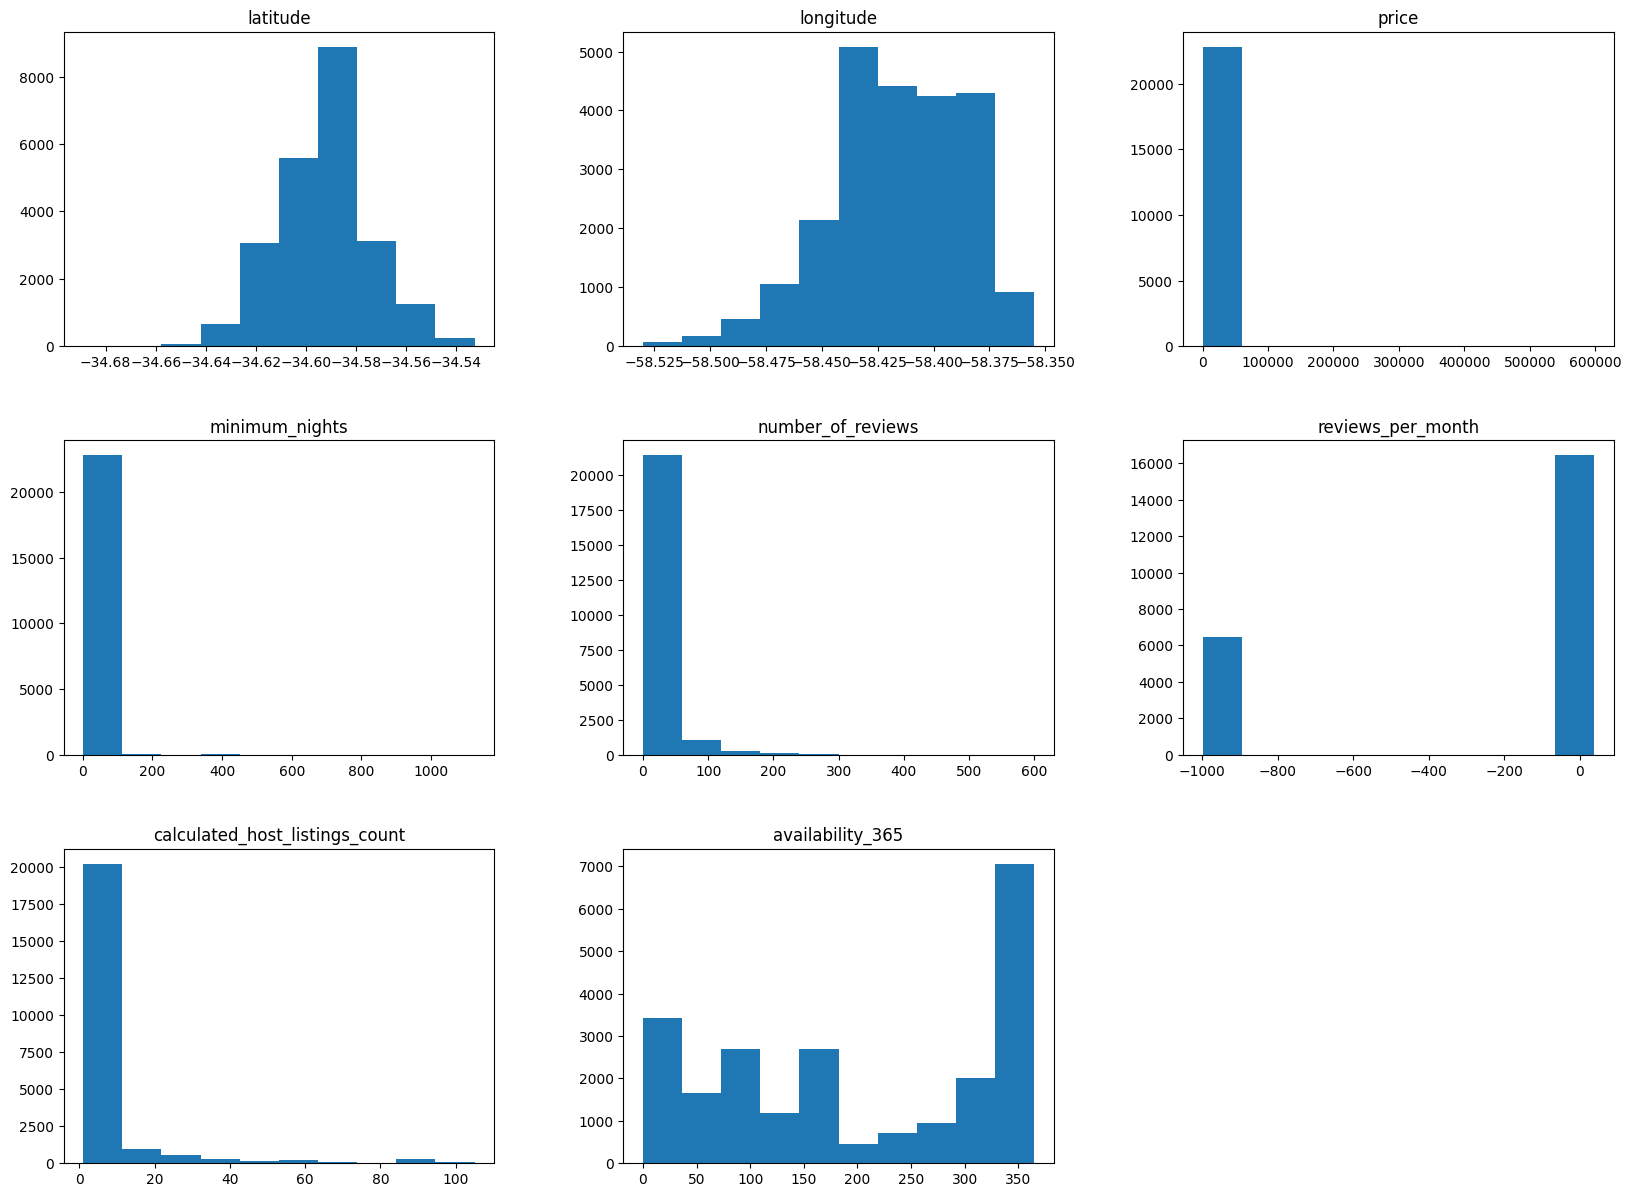

In [71]:
df_cuantitativas.hist(figsize=(20,20), layout=(4,3),grid=False)
plt.show()

# PARTE II. Modelado supervisado.

## Modelo que prediga el precio.

In [73]:
#Importamos el módulo que necesitamos
import statsmodels.formula.api as smf

#Construimos el modelo.
lm = smf.ols(formula='price~latitude + longitude + minimum_nights + number_of_reviews + reviews_per_month + calculated_host_listings_count + availability_365',data=df_cuantitativas).fit()

In [74]:
y = np.array(df_cuantitativas['price'])

In [75]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     16.45
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           8.91e-22
Time:                        00:50:12   Log-Likelihood:            -2.4796e+05
No. Observations:               22877   AIC:                         4.959e+05
Df Residuals:                   22869   BIC:                         4.960e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.934e+06   3.26e+05      5.929      0.000    1.29e+06    2.57e+06
latitude                        2.191e+04   5284.455      4.147      0.000    1.16e+04    3.23e+04
longitude                        2.01e+04   3244.951      6.194      0.000    1.37e+04    2.65e+04
minimum_nights                     8.3309      3.816      2.183      0.029       0.850      15.811
number_of_reviews                 -3.6791      2.757     -1.334      0.182      -9.083       1.725
reviews_per_month                 -0.9471      0.193     -4.905      0.000      -1.326      -0.569
calculated_host_listings_count     8.5756      5.624      1.525      0.127      -2.448      19.599
availability_365                   3.3007      0.613      5.386      0.000       2.100       4.502
==============================================================================
Omnibus:                    62401.634   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2006325450.166
Skew:                          34.220   Prob(JB):                         0.00
Kurtosis:                    1452.182   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Al analizar como varia el precio segun cada variables se puede ver que el numero de opiniones y numero de opiniones por mes la relacion es negativa, es decir que por cada punto porcentual que aumente el numero de opiniones y el numero de opiniones por mes el precio disminuye. 

Al analizar el p-valor de variables se puede ver que el numero de opiniones (p-valor=0.17) y numero de opiniones por mes (p-valor= 0.68) no son significativa (p-valor >0.05).

In [76]:
resid_val=lm.resid
fitted_val=lm.predict()
lm.resid.mean()

-1.4905659648386932e-09

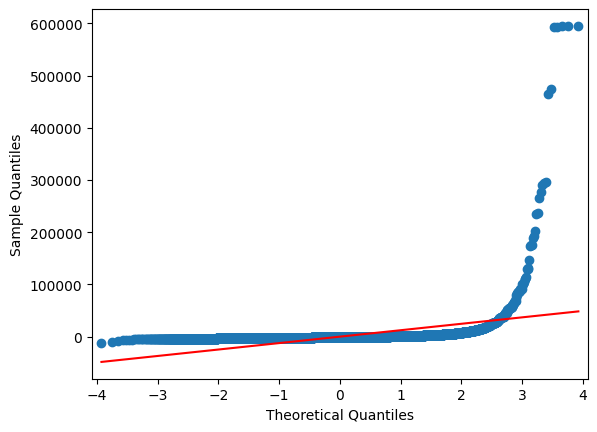

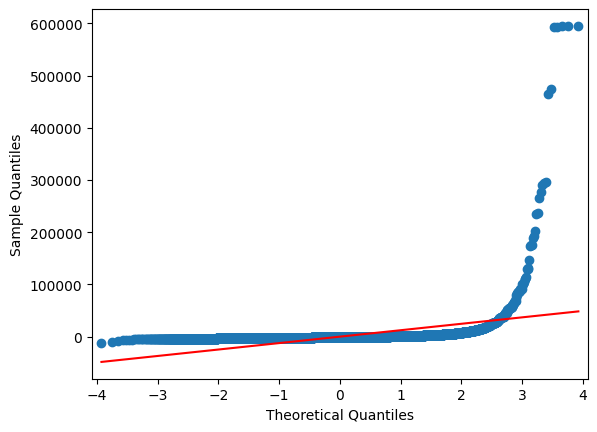

In [77]:
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
sm.qqplot(resid_val, line='s')


Ahora compruebo la homocedastocidad o igualdad de varianza de mi modelo 


Text(0.5, 1.0, 'Gráfico de Residuos vs Valores Ajustados')

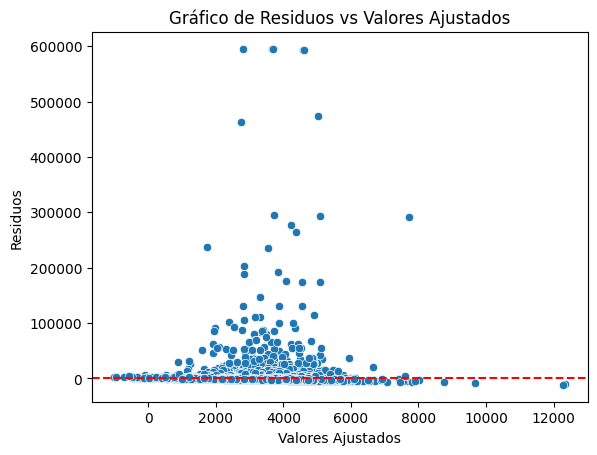

In [78]:
# Obtener los residuos
residuals = lm.resid

# Gráfico de dispersión de residuos vs valores ajustados
sns.scatterplot(x=lm.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Valores Ajustados')


Ajusto el modelo 

In [79]:
weights = 1.0 / np.power(lm.fittedvalues, 2)

# Ajustar el modelo utilizando regresión ponderada
weighted_lm = sm.WLS(df_cuantitativas['price'], sm.add_constant(df_cuantitativas[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']]), weights=weights).fit()
print(weighted_lm.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            WLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     89.09
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          1.23e-128
Time:                        00:50:31   Log-Likelihood:            -2.4520e+05
No. Observations:               22877   AIC:                         4.904e+05
Df Residuals:                   22869   BIC:                         4.905e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [80]:
df_cuantitativas.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [81]:
lm1 = smf.ols(formula='price~latitude + longitude + minimum_nights + calculated_host_listings_count + availability_365',data=df_cuantitativas).fit()

In [82]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.48
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           2.79e-16
Time:                        00:50:38   Log-Likelihood:            -2.4798e+05
No. Observations:               22877   AIC:                         4.960e+05
Df Residuals:                   22871   BIC:                         4.960e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.749e+06   3.25e+05      5.388      0.000    1.11e+06    2.38e+06
latitude                        1.936e+04   5267.890      3.676      0.000    9037.473    2.97e+04
longitude                       1.843e+04   3229.506      5.705      0.000    1.21e+04    2.48e+04
minimum_nights                    10.5758      3.799      2.784      0.005       3.130      18.021
calculated_host_listings_count    12.9360      5.576      2.320      0.020       2.007      23.864
availability_365                   3.1813      0.612      5.196      0.000       1.981       4.381
==============================================================================
Omnibus:                    62393.593   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2002250948.164
Skew:                          34.210   Prob(JB):                         0.00
Kurtosis:                    1450.708   Cond. No.                     9.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Gráfico de Residuos vs Valores Ajustados modelo 2')

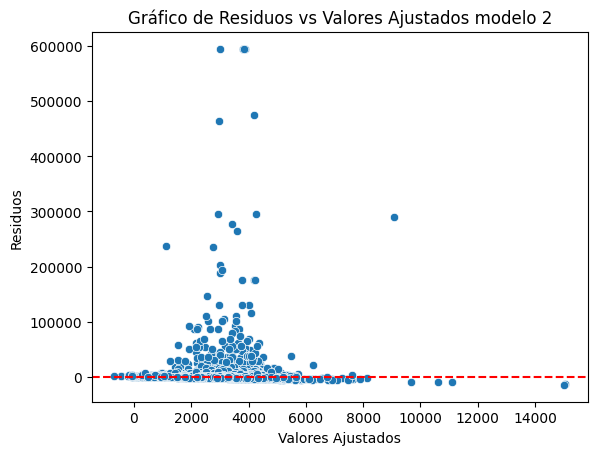

In [83]:
# Obtener los residuos
residuals = lm1.resid

# Gráfico de dispersión de residuos vs valores ajustados
sns.scatterplot(x=lm1.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Valores Ajustados modelo 2')

In [84]:
weights = 1.0 / np.power(lm1.fittedvalues, 2)

# Ajustar el modelo utilizando regresión ponderada
weighted_lm1 = sm.WLS(df_cuantitativas['price'], sm.add_constant(df_cuantitativas[['latitude', 'longitude', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]), weights=weights).fit()
print(weighted_lm1.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.018
Model:                            WLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     86.04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           6.52e-90
Time:                        00:50:48   Log-Likelihood:            -2.4718e+05
No. Observations:               22877   AIC:                         4.944e+05
Df Residuals:                   22871   BIC:                         4.944e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [85]:
#Vamos a hacer predicciones
df_cuantitativas['precio_predicciones'] = lm1.predict(df_cuantitativas[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

C:\Users\RominaSoledadDeLeon\AppData\Local\Temp\ipykernel_17728\3711849438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuantitativas['precio_predicciones'] = lm1.predict(df_cuantitativas[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']])


In [86]:
#Puedo calcular la suma de los cuadrados de las diferencias
ssd1 = sum((df_cuantitativas['price']-df_cuantitativas['precio_predicciones'])**2)
ssd1

3484704460434.442

In [87]:
df_cuantitativas.shape

(22877, 9)

In [88]:
#RSE 
rse1 = np.sqrt(ssd1/len(df_cuantitativas)-9-1)

rse1

12341.939843996974

In [89]:
df_cuantitativas['price'].mean()

3214.630196266993

In [90]:
#Veamos el error
error = rse1 / df_cuantitativas['price'].mean()

#Error
error

3.839303151674839

## Modelo que prediga el barrio.

### Clasificación - KNN

In [ ]:
#Importamos las librerias necesarias
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing,neighbors

In [ ]:
df.columns

In [ ]:
#Seleccionemos la variable

Y = df['neighbourhood']

X = df[['latitude', 'price','longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

#Veamos nuestras variables para
X.shape

In [ ]:
Y.shape

In [ ]:
Y.unique()

In [ ]:
#Dividimos el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#Generamos nuestra instancia de modelo # N_neighbors determinar el K del KNN a entrenar. 
#se utiliza una métrica de distancia apropiada para variables categóricas, como la distancia de Hamming 
#o la distancia de Jaccard.
clf = neighbors.KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Generamos nuestro modelo.
clf.fit(X_train,y_train)

In [ ]:
#Veamos la precisión
accuracy = clf.score(X_test,y_test)

#accuracy - Tenemos un gran resultado.
accuracy

In [ ]:
X.head()

In [ ]:
#Ahora clasifiquemos nuevas muestras cancerigenas.
#Generamos un nuevo dato falso

muestra_nueva = np.array([-34.58241,2000,-58.39382,20,28,0.15,5,300])

#Tiene 9 características
len(muestra_nueva)

In [ ]:
muestra_nueva = muestra_nueva.reshape(1,-1)
muestra_nueva

In [ ]:
prediccion = clf.predict(muestra_nueva)
prediccion

### Clasificación - Árboles de decisión.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
#Seleccionemos la variable

objetivo = df['neighbourhood']

predictoras = df[['latitude', 'price','longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]


In [ ]:
#Dividmos nuestro set en entrenamiento y test.
df['entrenamiento'] = np.random.uniform(0,1,len(df))<=0.75

#Efectivamente cuando lo compruebo, así sucede.
#Recordemos que en programación TRUE = 1
df['entrenamiento'].sum()/df.shape[0]

In [ ]:
df

In [ ]:
#Ahora separemos ambos conjuntos
entrenamiento,prueba = df[df['entrenamiento']==True],df[df['entrenamiento']==False]

In [ ]:
#Ahora generemos nuestro arbol
from sklearn.tree import DecisionTreeClassifier

In [ ]:
entrenamiento

In [ ]:
#Generamos nuestro objeto árbol
#Establecemos el criterio de "Entropía" para dividir las ramas y el mínimo de muestras que debe tener cada nodo
arbol = DecisionTreeClassifier(criterion='entropy',min_samples_split=10,random_state=99)

In [ ]:
#Entrenamos nuestro modelo con los datos de entrenamiento que generamos anteriormente
clf = arbol.fit(entrenamiento[predictoras.columns],entrenamiento['neighbourhood'])

In [ ]:
#Probarmos para ver las predicciones
predicciones = arbol.predict(prueba[predictoras.columns])

In [ ]:
arbol.predict(muestra_nueva)

In [ ]:
#Finalmente vemos cómo perfomó nuestro modelo con los datos predecidos.
matriz=pd.crosstab(prueba['neighbourhood'],predicciones,rownames=['Actual'],colnames=['Predicciones'])
matriz


### Bosques aleatorios para árboles de decisión o de clasificación.

In [ ]:
#Ahora haremos un random forest para clasificación - Vamos a buscar el método necesario
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creamos nuestra instancia
forest = RandomForestClassifier(n_jobs=2,oob_score=True,n_estimators=100)

In [ ]:
#Seleccionemos la variable

y = df['neighbourhood']

X = df[['latitude', 'price','longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [ ]:
#Ahora entrenamos nuestro modelo
forest.fit(X,y)

In [ ]:
#Ahora vemos la función de decisión
forest.oob_decision_function_[:10]

In [ ]:
#Tenemos un altísimo nivel de scoring.
round(forest.oob_score_,2)

In [ ]:
print("El modelo Knn predijo: ",clf.predict(muestra_nueva))
print("El modelo Árboles de decisión predijo: ",arbol.predict(muestra_nueva))
print("El modelo bosques aleatorios predijo: ", forest.predict(muestra_nueva))


In [ ]:

# Ahora preparo los datos de prueba
X_test = prueba[['latitude', 'price','longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Obtengo las predicciones
predicciones1 = forest.predict(X_test)

# Crear una tabla de las predicciones
tabla_forest= pd.crosstab(prueba['neighbourhood'], columns=predicciones1, rownames=['Actual'], colnames=['Predicciones1'])

tabla_forest

# PARTE III. Modelado no supervisado.

## a. Implementar el modelo de acuerdo a las variables de agrupamiento o predictoras que consideren mejor.

## b. Evaluar cuál es el mejor número de clusters para agrupar el conjunto de datos.

In [ ]:
#Cruzamos todas las variables para ver su covarianza. Agregamos una variable categórica para ver más variación
sns.pairplot(df,hue = 'neighbourhood')

In [ ]:
#Para el clustering, vamos a utilizar las variables continuas.
df_cuantitativas

In [ ]:
from sklearn.cluster import KMeans

Metodo Elobw

In [ ]:
#Para eso, necesitamos generar n valores para visualizar
def kmeans(data,n_clusters):

  valores = []

  for n in range(1,n_clusters):
    kmeans = KMeans(n_clusters=n,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)

    kmeans.fit(data)

    valores.append(kmeans.inertia_)

  plt.figure(figsize=(20,10))
  plt.plot(list(range(1,n_clusters)),valores,'-bD',  c='blue', mfc='red', mec='k')
  plt.title('Evaluación mediante método de Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('Inercia - WCSS')
  plt.grid(True)
  plt.show()

In [ ]:
#Ejecuto mi función
kmeans(df_cuantitativas,11)

In [ ]:
#Buscamos ahora las predicciones
#Busquemos generar una inercia más baja.
#Creamos nuestra instancia del algoritmo con los parámetros
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter = 100,
                n_init=10,
                random_state=0)

#Ajustamos el modelo
kmeans.fit(df_cuantitativas)

#Generamos las predicciones
y = kmeans.fit_predict(df_cuantitativas)

#Vemos las predicciones
y

In [ ]:
#Lo ponemos en el dataframe
df_cuantitativas['cluster'] = y

In [ ]:
import plotly.express as px

fig = px.scatter(df_cuantitativas, x="price", y="minimum_nights", color="cluster",
                 size='number_of_reviews')
fig.show()


In [ ]:
# Agrupar por barrio y contar
conteo_por_barrio = df.groupby('neighbourhood').size()

# Mostrar el resultado
print(conteo_por_barrio)